In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

ff_ps = np.array([-0.95088414, -0.59177142,  0.17633744,  1.4424729 ,  1.24481643,
    1.31553988,  0.18318057, -0.27174834, -1.28345969, -1.26448362])

fb_ps = np.array([-0.44530771,  0.60670543,  1.66233666,  0.66287436, -1.08918178,
    -0.30745872,  0.91616032,  0.65961318, -1.08541645, -1.58032529])

fb_ps = np.array([-1,  0.60670543,  .93,  0.66287436, -1.08918178,
    -0.30745872,  0.91616032,  0.65961318, 0.2, -1.08541645])


csv_file="/data/kleinrl/Wholebrain2.0/fsl_feats/"+\
    "fsl_feats_DF-smoothed_inv_thresh_zstat1.L2D-columns_ev_1000_borders.downscaled2x_NN.pkl"

df = pd.read_pickle(csv_file)

v4 = df[df.target == 791]

v4.shape

vs = [ v for v in df.columns if 'value' in v ] 

v4_to_plot = v4.loc[:,vs]
print(v4_to_plot.shape )
print(df.columns)

In [ ]:

from scipy import spatial



to_plot = v4_to_plot #.iloc[0:100,:]
to_plot.shape 

x = [ i for i in range(len(vs)) ]

corrs = []

for i in range(to_plot.shape[0]):

    y = to_plot[vs].iloc[i]
    y = (y-np.mean(y))/np.std(y)
    y = y.to_numpy()

    #print(ff_ps)
    #print(y)

    #co = np.corrcoef(fb_ps, y)[0,1]
    co = 1 - spatial.distance.cosine(fb_ps, y)

    corrs.append(co)
    #print(co)
    
    #to_plot['fb_corr'].iloc[i] = co 

    #plt.plot(x,y)



#to_plot['fb_corrs'] = corrs
to_plot.iloc[1:10,:]


,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9
1776,0.333884,3.065243e-01,0.377211,0.378093,0.380152,3.803784e-01,4.691723e-01,0.512487,0.616337,0.605182
2768,0.406134,4.703265e-01,0.442006,0.448595,0.410250,4.006885e-01,4.126691e-01,0.332671,0.263286,0.396545
3760,0.700800,7.300528e-01,0.733894,0.736832,0.500010,3.860145e-01,3.039865e-01,0.280027,0.277689,0.522880
4752,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
5744,0.000003,9.825780e-07,-0.000011,-0.000011,-0.000005,-6.753756e-07,-1.232862e-07,-0.000001,0.000005,0.000014
6736,0.262802,1.757501e-01,0.170273,0.087425,0.105671,9.970871e-02,1.073214e-01,0.084804,0.083778,0.036686
7728,0.000005,-6.445804e-06,-0.000039,0.000011,0.000003,1.550765e-05,2.360668e-05,0.000012,0.000035,-0.000046
8720,0.123389,3.854327e-01,0.222491,0.198908,0.163557,1.704596e-01,1.466088e-01,0.081934,0.045807,0.024080
9712,0.267641,2.856777e-01,0.328910,0.293409,0.302538,2.838956e-01,2.825285e-01,0.324155,0.357251,0.272552


In [ ]:
to_plot['fb_corr'] = corrs

to_plot = to_plot.sort_values('fb_corr', ascending=False)

to_plot.iloc[1:10,:]

,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,fb_corr
35504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
65264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
242832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
114864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
308304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
143632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


/tmp/ipykernel_415/2296268820.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()


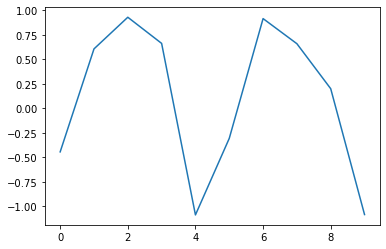

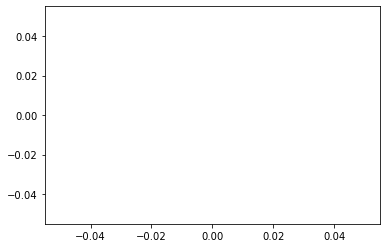

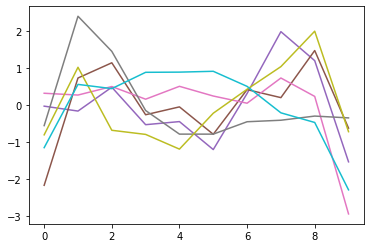

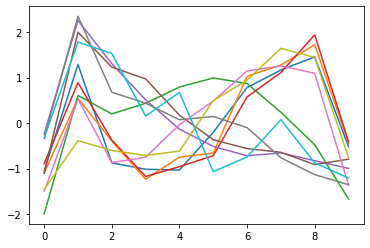

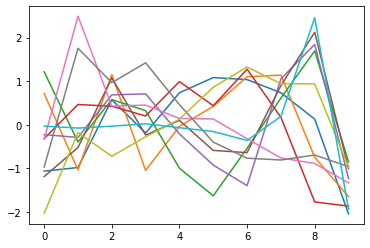

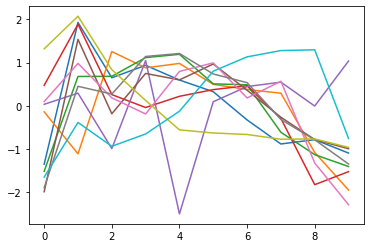

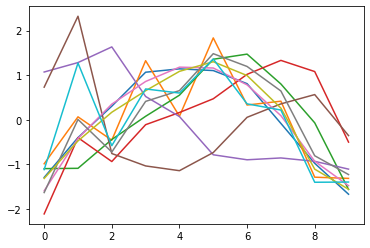

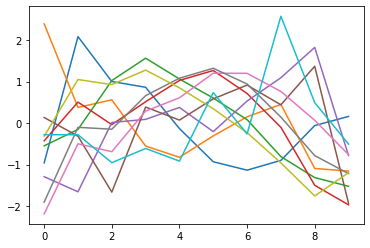

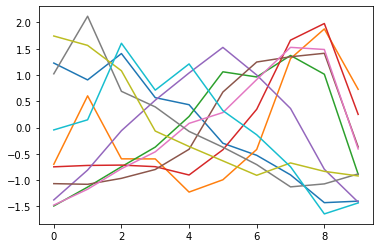

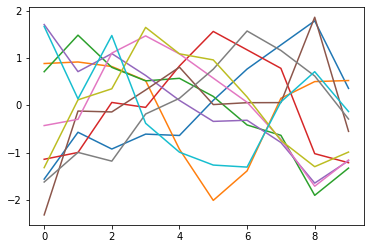

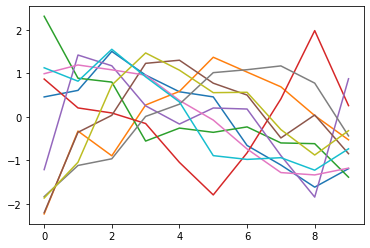

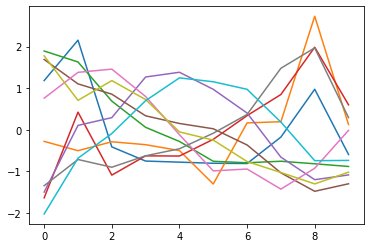

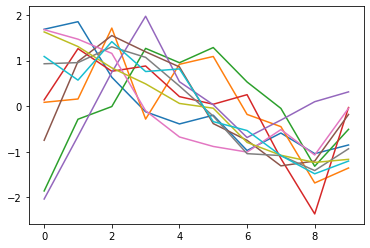

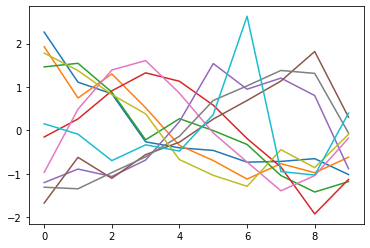

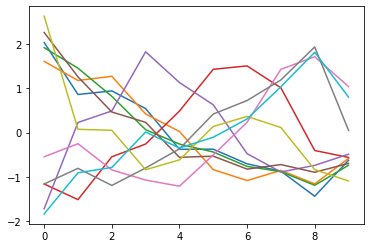

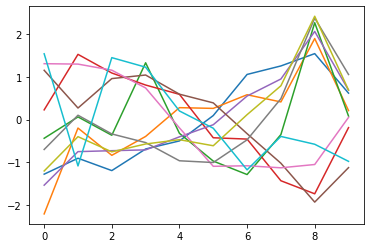

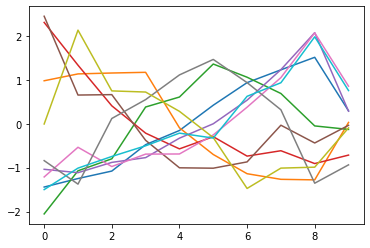

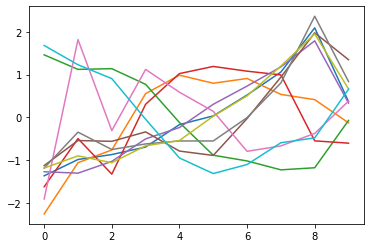

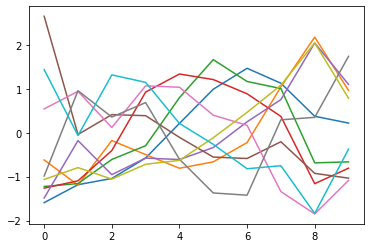

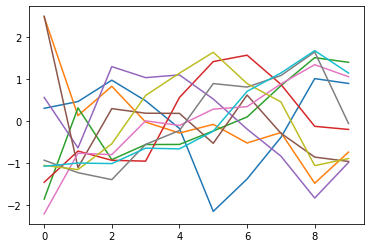

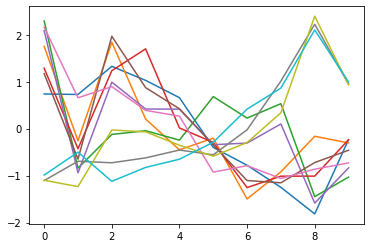

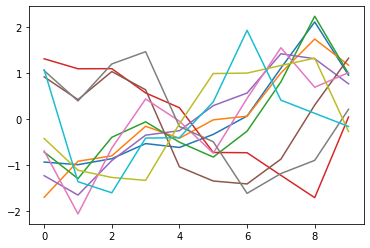

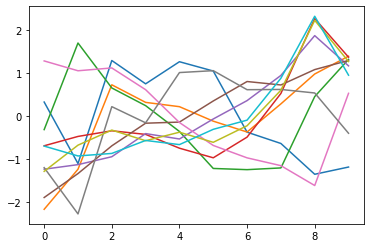

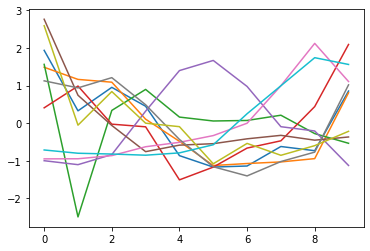

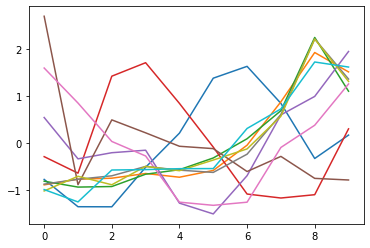

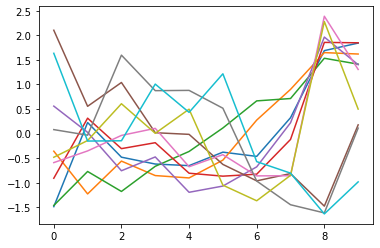

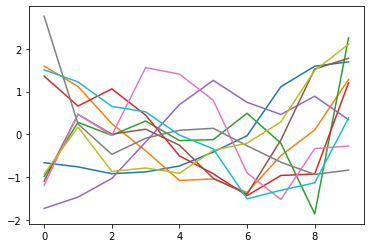

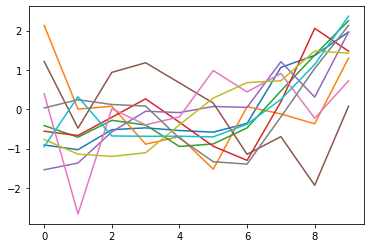

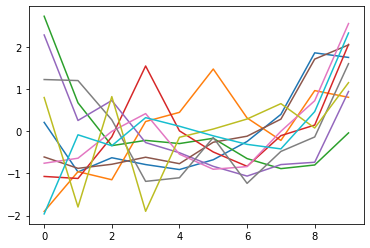

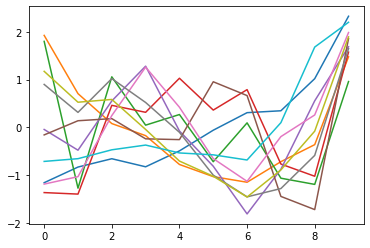

In [78]:

f = plt.figure()
plt.plot(x, fb_ps)

for i in range(to_plot.shape[0]):
    if i%10 == 0: 
        f = plt.figure()

    y = to_plot[vs].iloc[i] #to_plot.iloc[i,:]
    y = (y-np.mean(y))/np.std(y)

    plt.plot(x,y)